## TELEPORTATION IMPLEMENTATION

In [1]:
from qiskit import *
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

In [2]:
def initialize_qubit(circuit, qubit_index):
    
    circuit.initialize([np.sqrt(0.80), np.sqrt(0.20)], qubit_index)
    
    return circuit

In [3]:
def entangle_qubits(circuit, qA, qB):
    
    circuit.h(qA)
    circuit.cx(qA, qB)
    
    return circuit

In [4]:
def bell_meas_Alice_qubits(circuit, qA1, qA2, clA1, clA2):

    circuit.cx(qA1, qA2)
    circuit.h(qA1)
    circuit.barrier()
    circuit.measure(qA1, clA1)
    circuit.measure(qA2, clA2)

    return circuit

In [5]:
 def controlled_ops_Bob_qubit(circuit, qB, clA1, clA2):
    
    circuit.x(qB).c_if(clA2, 1)
    circuit.z(qB).c_if(clA1, 1)    
    
    return circuit

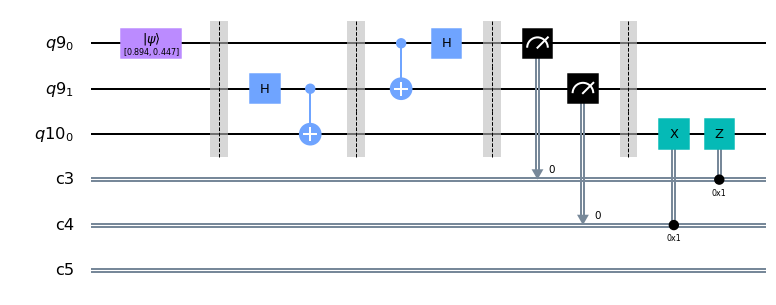

In [8]:
all_qA = QuantumRegister(2)
all_qB = QuantumRegister(1)
creg_A1 = ClassicalRegister(1)
creg_A2 = ClassicalRegister(1)
creg_B = ClassicalRegister(1)

teleportation = QuantumCircuit(all_qA, all_qB, creg_A1, creg_A2, creg_B)

initialize_qubit(teleportation, 0)
teleportation.barrier()

entangle_qubits(teleportation, 1, 2)
teleportation.barrier()

bell_meas_Alice_qubits(teleportation, all_qA[0], all_qA[1], creg_A1, creg_A2)
teleportation.barrier()

controlled_ops_Bob_qubit(teleportation, all_qB[0], creg_A1, creg_A2)

teleportation.draw(output='mpl')

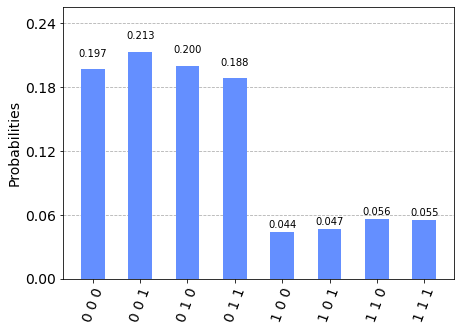

In [7]:
teleportation.measure(all_qB[0], creg_B)
simulator = Aer.get_backend('qasm_simulator')
result = execute(teleportation, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)